In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from glob import glob

train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

In [3]:
np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

## Modelo con 10% de los datos de entrenamiento

In [4]:
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    while len(X_train) < N_train*0.1:
        Y_train.append( int(train_file.split('/')[3]) )
        X_train.append(np.array(Image.open(train_file)))
        
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

In [5]:
len(X_train), len(X_valid), len(X_test)

(600, 2000, 992)

In [6]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([600, 28, 28])

In [7]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [8]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)  

Epoch [1/100], loss: 45.16188430786133. f1:0.0 acc: 0.0 
Epoch [2/100], loss: 13.717849731445312. f1:0.0 acc: 0.0 
Epoch [3/100], loss: 0.008413112722337246. f1:1.0 acc: 1.0 
Epoch [4/100], loss: 9.536742027194123e-07. f1:1.0 acc: 1.0 
Epoch [5/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [6/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [7/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [8/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [9/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [10/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [11/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [12/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [13/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [14/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [15/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [16/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [17/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [18/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [19/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [20/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [21/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [22/100], loss:

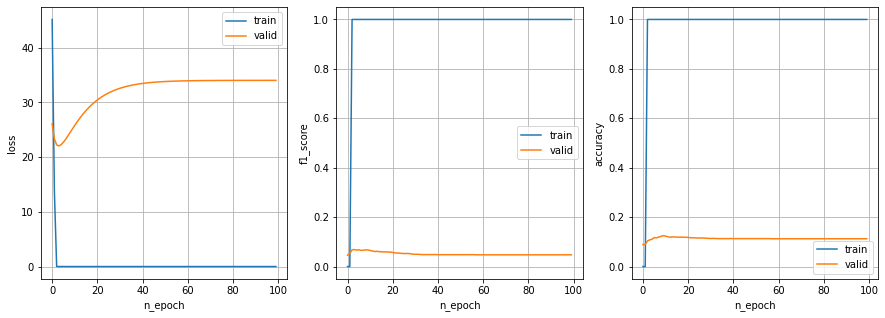

In [9]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con 20% de los datos de entrenamiento

In [10]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    while len(X_train) < N_train*0.2:
        Y_train.append( int(train_file.split('/')[3]) )
        X_train.append(np.array(Image.open(train_file)))
        
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

In [11]:
len(X_train), len(X_valid), len(X_test)

(1200, 2000, 992)

In [12]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([1200, 28, 28])

In [13]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [14]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)  

Epoch [1/100], loss: 25.53501319885254. f1:0.0 acc: 0.0 
Epoch [2/100], loss: 9.616881370544434. f1:0.0 acc: 0.0 
Epoch [3/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [4/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [5/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [6/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [7/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [8/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [9/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [10/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [11/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [12/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [13/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [14/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [15/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [16/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [17/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [18/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [19/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [20/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [21/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [22/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [23/100

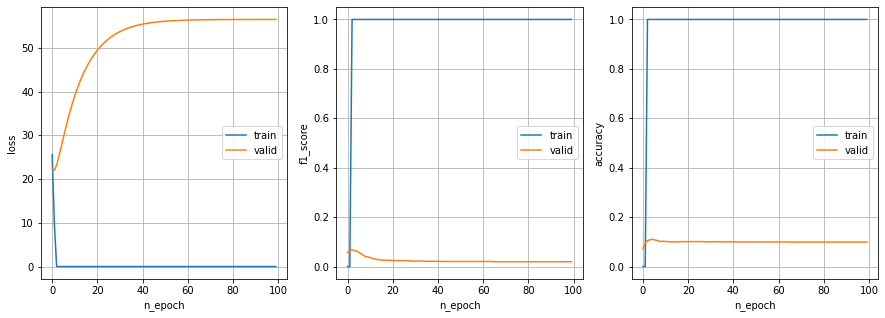

In [15]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con el 50% de los datos de entrenamiento

In [16]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    while len(X_train) < N_train*0.5:
        Y_train.append( int(train_file.split('/')[3]) )
        X_train.append(np.array(Image.open(train_file)))
        
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

In [17]:
len(X_train), len(X_valid), len(X_test)

(3000, 2000, 992)

In [18]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([3000, 28, 28])

In [19]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [20]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)  

Epoch [1/100], loss: 28.524965286254883. f1:0.0 acc: 0.0 
Epoch [2/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [3/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [4/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [5/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [6/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [7/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [8/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [9/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [10/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [11/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [12/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [13/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [14/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [15/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [16/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [17/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [18/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [19/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [20/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [21/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [22/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [23/100], loss: 0.0.

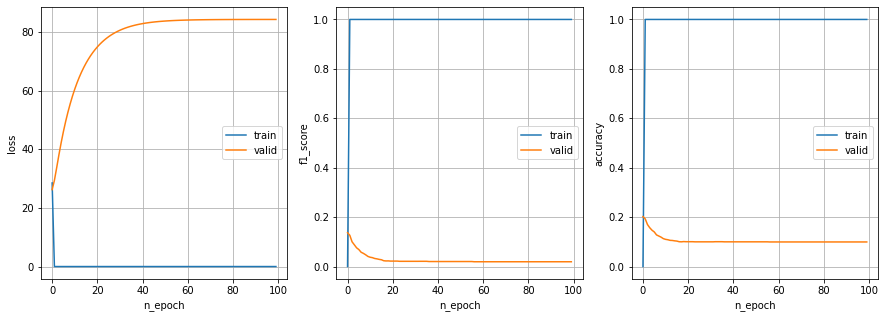

In [21]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con el 80% de los datos de entrenamiento

In [22]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    while len(X_train) < N_train*0.8:
        Y_train.append( int(train_file.split('/')[3]) )
        X_train.append(np.array(Image.open(train_file)))
        
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

In [23]:
len(X_train), len(X_valid), len(X_test)

(4800, 2000, 992)

In [24]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([4800, 28, 28])

In [25]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [26]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

Epoch [1/100], loss: 42.217533111572266. f1:0.0 acc: 0.0 
Epoch [2/100], loss: 18.827360153198242. f1:0.0 acc: 0.0 
Epoch [3/100], loss: 0.2446765899658203. f1:1.0 acc: 1.0 
Epoch [4/100], loss: 2.0265558760002023e-06. f1:1.0 acc: 1.0 
Epoch [5/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [6/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [7/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [8/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [9/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [10/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [11/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [12/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [13/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [14/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [15/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [16/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [17/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [18/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [19/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [20/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [21/100], loss: 0.0. f1:1.0 acc: 1.0 
Epoch [22/100], loss:

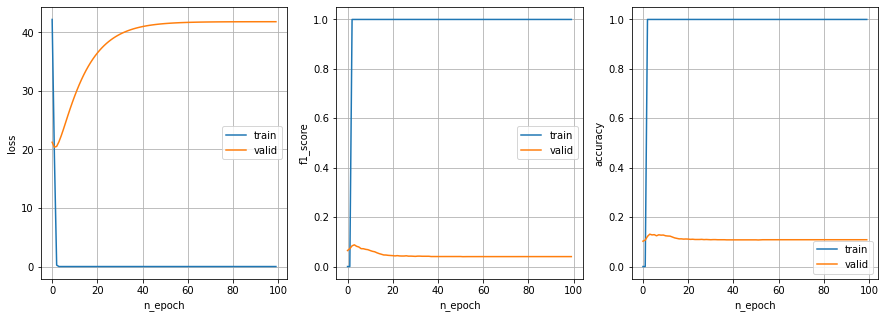

In [27]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con el 100% de los datos de entrenamiento

In [28]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
    
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

In [29]:
len(X_train), len(X_valid), len(X_test)

(6000, 2000, 992)

In [30]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [31]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [32]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

Epoch [1/100], loss: 37.47200012207031. f1:0.04363048293193385 acc: 0.09300000220537186 
Epoch [2/100], loss: 20.76165199279785. f1:0.09572023851292102 acc: 0.12516666948795319 
Epoch [3/100], loss: 16.046077728271484. f1:0.17507912532693728 acc: 0.19633333384990692 
Epoch [4/100], loss: 12.29574966430664. f1:0.25725299385374906 acc: 0.28816667199134827 
Epoch [5/100], loss: 9.503196716308594. f1:0.3478608029461213 acc: 0.38100001215934753 
Epoch [6/100], loss: 7.149392127990723. f1:0.4135640452784477 acc: 0.44866666197776794 
Epoch [7/100], loss: 5.168727874755859. f1:0.4787719994168288 acc: 0.5096666812896729 
Epoch [8/100], loss: 3.862205743789673. f1:0.5472947709841789 acc: 0.5600000023841858 
Epoch [9/100], loss: 3.2102208137512207. f1:0.5982222422147929 acc: 0.5996666550636292 
Epoch [10/100], loss: 2.9921035766601562. f1:0.6224742980698982 acc: 0.6225000023841858 
Epoch [11/100], loss: 2.8896145820617676. f1:0.6307159257886021 acc: 0.6323333382606506 
Epoch [12/100], loss: 2.678

Epoch [97/100], loss: 0.20708727836608887. f1:0.9454450196434955 acc: 0.9455000162124634 
Epoch [98/100], loss: 0.20430192351341248. f1:0.9459559170414344 acc: 0.9459999799728394 
Epoch [99/100], loss: 0.20156653225421906. f1:0.946966011622334 acc: 0.9470000267028809 
Epoch [100/100], loss: 0.19887393712997437. f1:0.9476377595188377 acc: 0.9476666450500488 


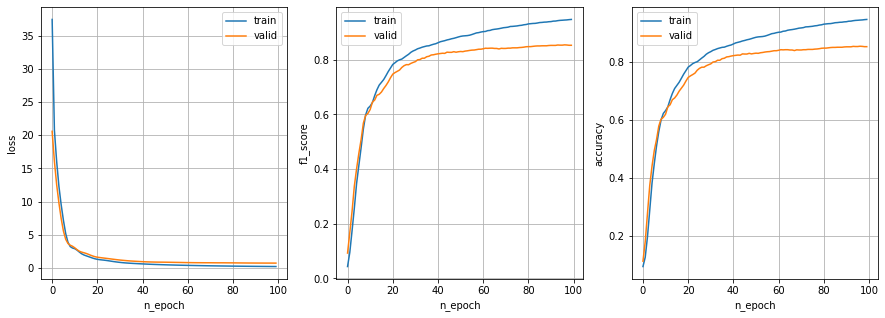

In [33]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Observacion:

Los datos de entrenamiento afectan de forma bastante notable las curvas de loss, f1_score y accuracy del modelo, pues si el conjunto de datos de entrenamiento no contiene el 100% de los datos, la precision en la prediccion con los datos de entrenamiento y la validacion difieren demasiado hasta ver como el accuracy y el loss del entrenamiento son practicamente prefectos mientras que la validacion arroja todo lo contrario. En conclusion, el tamaño de los datos de entrenamiento afecta a la hora de evaluar que tan bueno es el modelo diseñado.

## Modelo con el 10% de los datos de testeo

In [35]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
    
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    while len(X_test) < N_test*0.1:
        Y_test.append( int(test_file.split('/')[3]) )
        X_test.append( np.array(Image.open(test_file)) )

In [36]:
len(X_train), len(X_valid), len(X_test)

(6000, 2000, 100)

In [37]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [38]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [39]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

Epoch [1/100], loss: 25.15760612487793. f1:0.07932281031820712 acc: 0.10400000214576721 
Epoch [2/100], loss: 14.774431228637695. f1:0.13245674588012993 acc: 0.15066666901111603 
Epoch [3/100], loss: 10.196487426757812. f1:0.2305923199269282 acc: 0.26233333349227905 
Epoch [4/100], loss: 6.68769645690918. f1:0.3570264156931181 acc: 0.38866665959358215 
Epoch [5/100], loss: 4.677577018737793. f1:0.49573389902455656 acc: 0.5090000033378601 
Epoch [6/100], loss: 3.773789167404175. f1:0.5766686152341929 acc: 0.5879999995231628 
Epoch [7/100], loss: 3.377612352371216. f1:0.6178433034465485 acc: 0.6243333220481873 
Epoch [8/100], loss: 2.981761932373047. f1:0.6480097547244259 acc: 0.6521666646003723 
Epoch [9/100], loss: 2.6142685413360596. f1:0.6812111530490413 acc: 0.6846666932106018 
Epoch [10/100], loss: 2.3533687591552734. f1:0.7085232371822998 acc: 0.7124999761581421 
Epoch [11/100], loss: 2.1386613845825195. f1:0.7292185540555528 acc: 0.7331666946411133 
Epoch [12/100], loss: 1.951157

Epoch [94/100], loss: 0.15673291683197021. f1:0.9547947417785636 acc: 0.9548333287239075 
Epoch [95/100], loss: 0.15417799353599548. f1:0.9556258665439762 acc: 0.9556666612625122 
Epoch [96/100], loss: 0.15167248249053955. f1:0.9562920042213211 acc: 0.956333339214325 
Epoch [97/100], loss: 0.14925214648246765. f1:0.9567888100810226 acc: 0.9568333625793457 
Epoch [98/100], loss: 0.1468992829322815. f1:0.9572894444264402 acc: 0.9573333263397217 
Epoch [99/100], loss: 0.14459310472011566. f1:0.9581299557600153 acc: 0.9581666588783264 
Epoch [100/100], loss: 0.14233729243278503. f1:0.9586253169142704 acc: 0.9586666822433472 


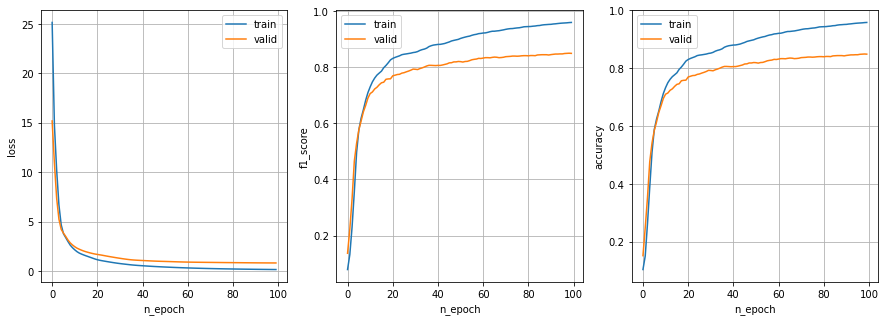

In [40]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con el 20% de los datos de testeo

In [41]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
    
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    while len(X_test) < N_test*0.2:
        Y_test.append( int(test_file.split('/')[3]) )
        X_test.append( np.array(Image.open(test_file)) )

In [42]:
len(X_train), len(X_valid), len(X_test)

(6000, 2000, 199)

In [43]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [44]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [45]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

Epoch [1/100], loss: 35.16805648803711. f1:0.028606409558979234 acc: 0.06316666305065155 
Epoch [2/100], loss: 20.851783752441406. f1:0.06769828930243711 acc: 0.0833333358168602 
Epoch [3/100], loss: 14.974281311035156. f1:0.12772615950395821 acc: 0.14416666328907013 
Epoch [4/100], loss: 11.541027069091797. f1:0.19464587327372224 acc: 0.21783334016799927 
Epoch [5/100], loss: 8.390511512756348. f1:0.2860674656931683 acc: 0.30783334374427795 
Epoch [6/100], loss: 6.1980671882629395. f1:0.3674445387555168 acc: 0.39250001311302185 
Epoch [7/100], loss: 5.04630708694458. f1:0.4281483705891085 acc: 0.4508333206176758 
Epoch [8/100], loss: 4.248287677764893. f1:0.475114629918634 acc: 0.4961666762828827 
Epoch [9/100], loss: 3.5608277320861816. f1:0.5234502390886581 acc: 0.5400000214576721 
Epoch [10/100], loss: 3.0627012252807617. f1:0.5653818583381639 acc: 0.5761666893959045 
Epoch [11/100], loss: 2.765777111053467. f1:0.5963183271580503 acc: 0.6016666889190674 
Epoch [12/100], loss: 2.577

Epoch [95/100], loss: 0.23216280341148376. f1:0.9348451739354452 acc: 0.9350000023841858 
Epoch [96/100], loss: 0.22894299030303955. f1:0.9361917885562476 acc: 0.9363333582878113 
Epoch [97/100], loss: 0.22581036388874054. f1:0.9375261705492463 acc: 0.937666654586792 
Epoch [98/100], loss: 0.2227276861667633. f1:0.9381892619011338 acc: 0.9383333325386047 
Epoch [99/100], loss: 0.21968774497509003. f1:0.9386848597827335 acc: 0.9388333559036255 
Epoch [100/100], loss: 0.2166769653558731. f1:0.939718141595429 acc: 0.9398333430290222 


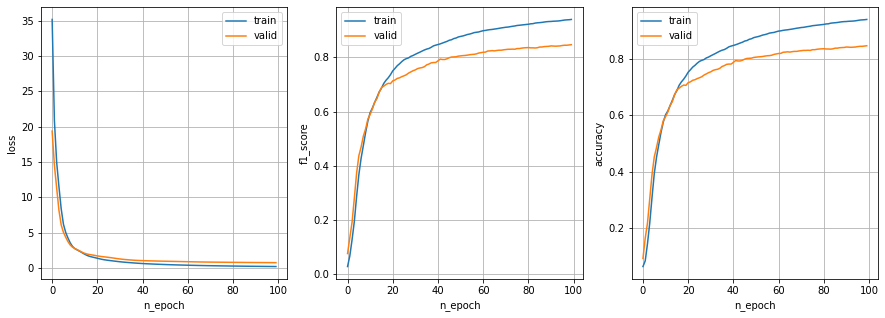

In [46]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con el 50% de los datos de testeo

In [47]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
    
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    while len(X_test) < N_test*0.5:
        Y_test.append( int(test_file.split('/')[3]) )
        X_test.append( np.array(Image.open(test_file)) )

In [48]:
len(X_train), len(X_valid), len(X_test)

(6000, 2000, 496)

In [49]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [50]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [51]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

Epoch [1/100], loss: 27.863189697265625. f1:0.051566541048228366 acc: 0.07716666907072067 
Epoch [2/100], loss: 18.146068572998047. f1:0.09134210003390411 acc: 0.1326666623353958 
Epoch [3/100], loss: 12.85876178741455. f1:0.1594390434335371 acc: 0.19750000536441803 
Epoch [4/100], loss: 10.735719680786133. f1:0.215220879591427 acc: 0.25066667795181274 
Epoch [5/100], loss: 7.71610164642334. f1:0.30965834155261407 acc: 0.3461666703224182 
Epoch [6/100], loss: 5.250164031982422. f1:0.41296456797938735 acc: 0.44433334469795227 
Epoch [7/100], loss: 3.7873106002807617. f1:0.49061353192344204 acc: 0.5038333535194397 
Epoch [8/100], loss: 3.2917754650115967. f1:0.5421470901382552 acc: 0.543833315372467 
Epoch [9/100], loss: 3.299245834350586. f1:0.5548354044941026 acc: 0.5526666641235352 
Epoch [10/100], loss: 3.084127902984619. f1:0.5777289363735428 acc: 0.5738333463668823 
Epoch [11/100], loss: 2.6987903118133545. f1:0.6115285468223313 acc: 0.6086666584014893 
Epoch [12/100], loss: 2.3908

Epoch [94/100], loss: 0.2003326565027237. f1:0.9409360135951788 acc: 0.9409999847412109 
Epoch [95/100], loss: 0.19745635986328125. f1:0.9421008101729941 acc: 0.9421666860580444 
Epoch [96/100], loss: 0.1946934163570404. f1:0.9431169535597455 acc: 0.9431666731834412 
Epoch [97/100], loss: 0.1920219361782074. f1:0.9437817020912906 acc: 0.9438333511352539 
Epoch [98/100], loss: 0.18941675126552582. f1:0.9442781233323473 acc: 0.9443333148956299 
Epoch [99/100], loss: 0.18694160878658295. f1:0.9449469929590503 acc: 0.9449999928474426 
Epoch [100/100], loss: 0.18441042304039001. f1:0.945436197815059 acc: 0.9455000162124634 


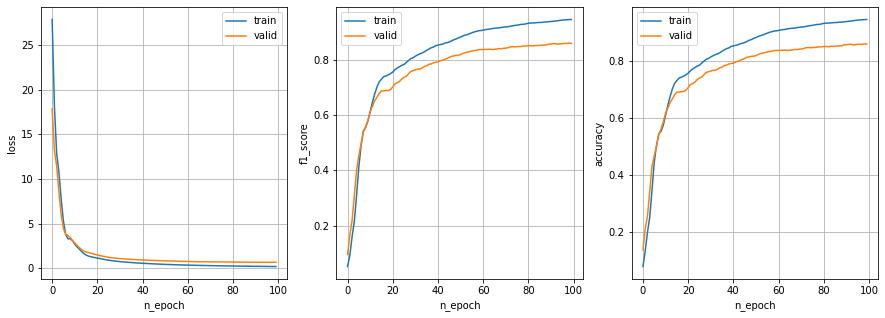

In [52]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con el 80% de los datos de testeo

In [53]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
    
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    while len(X_test) < N_test*0.8:
        Y_test.append( int(test_file.split('/')[3]) )
        X_test.append( np.array(Image.open(test_file)) )

In [54]:
len(X_train), len(X_valid), len(X_test)

(6000, 2000, 794)

In [55]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [56]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [57]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

Epoch [1/100], loss: 26.492265701293945. f1:0.08304722748247777 acc: 0.10100000351667404 
Epoch [2/100], loss: 18.70531463623047. f1:0.10704136434206972 acc: 0.10249999910593033 
Epoch [3/100], loss: 13.457233428955078. f1:0.21916761824106729 acc: 0.2318333387374878 
Epoch [4/100], loss: 10.140542030334473. f1:0.33921224901414126 acc: 0.367166668176651 
Epoch [5/100], loss: 7.66414213180542. f1:0.4285423619231037 acc: 0.4593333303928375 
Epoch [6/100], loss: 5.945070743560791. f1:0.4964221075157081 acc: 0.5285000205039978 
Epoch [7/100], loss: 4.611386299133301. f1:0.5526368193721585 acc: 0.5831666588783264 
Epoch [8/100], loss: 3.5132663249969482. f1:0.6110286792777069 acc: 0.6321666836738586 
Epoch [9/100], loss: 2.705003261566162. f1:0.6678355694387664 acc: 0.6759999990463257 
Epoch [10/100], loss: 2.231884002685547. f1:0.7107895250129201 acc: 0.7103333473205566 
Epoch [11/100], loss: 2.0447933673858643. f1:0.7312528924592956 acc: 0.7279999852180481 
Epoch [12/100], loss: 1.98403382

Epoch [95/100], loss: 0.19703473150730133. f1:0.9419336365207569 acc: 0.9419999718666077 
Epoch [96/100], loss: 0.19445806741714478. f1:0.9429341188594769 acc: 0.9430000185966492 
Epoch [97/100], loss: 0.19193066656589508. f1:0.9439501447645865 acc: 0.9440000057220459 
Epoch [98/100], loss: 0.18945910036563873. f1:0.9444337180111972 acc: 0.9445000290870667 
Epoch [99/100], loss: 0.18703879415988922. f1:0.9447762451517668 acc: 0.9448333382606506 
Epoch [100/100], loss: 0.1846645325422287. f1:0.9459614360097754 acc: 0.9459999799728394 


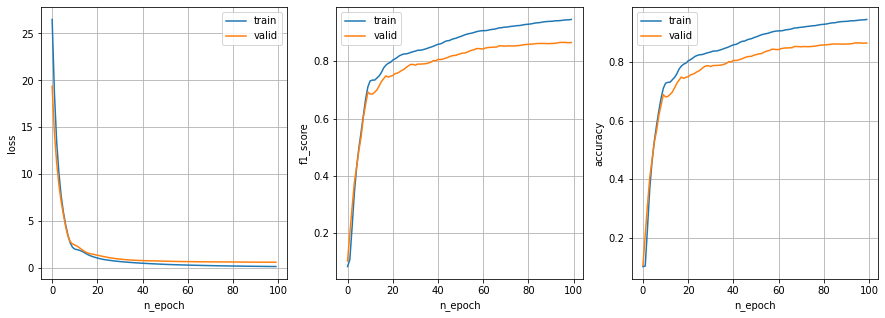

In [58]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Modelo con el 100% de los datos de testeo

In [59]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
    
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )
    
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

In [60]:
len(X_train), len(X_valid), len(X_test)

(6000, 2000, 992)

In [61]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [62]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [63]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

Epoch [1/100], loss: 21.793907165527344. f1:0.07953958483826046 acc: 0.09749999642372131 
Epoch [2/100], loss: 16.262624740600586. f1:0.12565362909663264 acc: 0.15850000083446503 
Epoch [3/100], loss: 10.977300643920898. f1:0.22714637092391904 acc: 0.2628333270549774 
Epoch [4/100], loss: 7.193591117858887. f1:0.35246865783564746 acc: 0.3774999976158142 
Epoch [5/100], loss: 4.91531229019165. f1:0.4710265394292992 acc: 0.4806666672229767 
Epoch [6/100], loss: 3.874830961227417. f1:0.5353927429430609 acc: 0.5450000166893005 
Epoch [7/100], loss: 3.235590934753418. f1:0.5891372331511069 acc: 0.5956666469573975 
Epoch [8/100], loss: 2.790102481842041. f1:0.6289804891062458 acc: 0.6330000162124634 
Epoch [9/100], loss: 2.472958564758301. f1:0.658830186176175 acc: 0.6608333587646484 
Epoch [10/100], loss: 2.1863667964935303. f1:0.6840579109444072 acc: 0.6851666569709778 
Epoch [11/100], loss: 1.8997589349746704. f1:0.7126240803194455 acc: 0.7133333086967468 
Epoch [12/100], loss: 1.65716826

Epoch [96/100], loss: 0.16157633066177368. f1:0.956775507477769 acc: 0.9568333625793457 
Epoch [97/100], loss: 0.15909208357334137. f1:0.9569538839968109 acc: 0.9570000171661377 
Epoch [98/100], loss: 0.15665677189826965. f1:0.9572964829429603 acc: 0.9573333263397217 
Epoch [99/100], loss: 0.1542825549840927. f1:0.9576296022214479 acc: 0.9576666951179504 
Epoch [100/100], loss: 0.15194715559482574. f1:0.9581260425207766 acc: 0.9581666588783264 


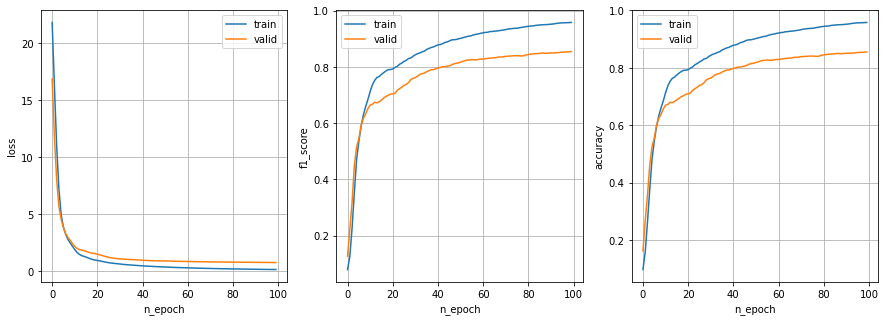

In [64]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Observacion:

En este caso variar el tamaño del conjunto de datos de testeo no afecto de forma muy notable los resultados de las predicciones de cada modelo. En cuanto a las curvas de loss, f1_score y accuracy, observamos que f1_score y accuracy se mantienen practicamente iguales en todos los modelos, y la curva de loss cambiaba ligeramente con el tamaño de los datos de testeo, aunque dicho cambio tampoco es tan significativo.